Calvin Passmore

ECE 6600

# Lab 1

## Large Scale Fading

### Q.1
Re-write PL(d) in dB form, i.e, PL(d)[dB].

PL(d) = <sup>Pt</sup>/<sub>Pr(d)</sub>

PL(d)[dB] = 10 log<sub>10</sub>(<sup>Pt</sup>/<sub>Pr(d)</sub>)

### Q.2
Set the frequency as 1500 MHz, x-axis is the distance from 1 m to 1000 m (log-scale), y-axis is the PL(d)[dB]. Please compare three different antenna configurations. [Gt = 1,Gr = 1], [Gt = 1,Gr = 0.5] and [Gt = 0.5,Gr = 0.5] and plot them in the same figure. 
Please discuss what factors can affect path loss?

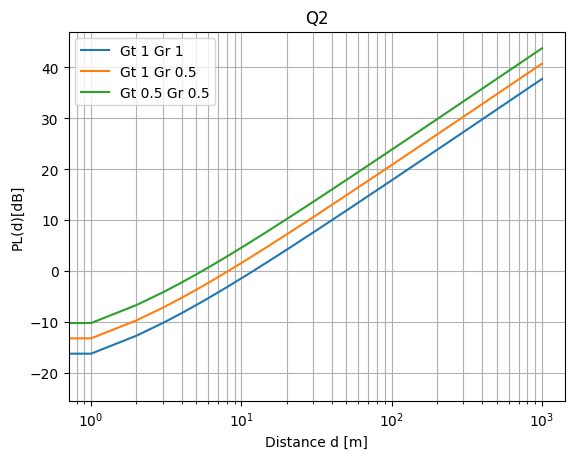

In [3]:
import matplotlib.pyplot as plt
from math import log10, pi

c = 299792458 # Speed of light
Freq = 1500e3 # Hz
Pt = 10 # Watts
L = 1.5 # Loss Factor >= 1
wavelength = c/Freq
gains = [[1,1], [1, 0.5], [0.5, 0.5]] # [Gt, Gr]
plt.figure()

for Gt,Gr in gains:
    PLdB = []
    for d in range(1,1000 + 1):
        Pr = (Pt * Gt * Gr * wavelength**2) / ((4 * pi)**2 * d**2 * L)
        PLdB.append(10 * log10(Pt / Pr))
    plt.plot(PLdB)
plt.legend([f"Gt {gains[0][0]} Gr {gains[0][1]}", f"Gt {gains[1][0]} Gr {gains[1][1]}", f"Gt {gains[2][0]} Gr {gains[2][1]}"])
plt.ylabel(f"PL(d)[dB]")
plt.xlabel(f"Distance d [m]")
plt.xscale('log')
plt.title("Q2")
plt.grid(which='both')
plt.show()
    

The factors that affect path loss are the transmit and receive gains, the distance the signal must travel, and the frequency of the signal.
The less gain the transmitter and/or receiver have, the more path loss there will be.
The more distance the signal must travel, the signal is being lost at an exponential rate.
The frequency of the signal also affects it (although it's not plotted), the higher the frequency the more path loss there is.

### Q.3

PL<sub>LD</sub>[dB] = PL(d<sub>0</sub>)[dB] + 10<i>n</i>log(<sup>d</sup>/<sub>d<sub>0</sub></sub>)

Set n = 2,3,6 and d0 = 100m, [Gt = 1,Gr = 1], other set ups are the same as those in <i>Q.2</i>.
Plot x-axis from 1m to 1000 m (log-scale), and y-axis as path loss in dB.
Please discuss what factors that may affect path loss?

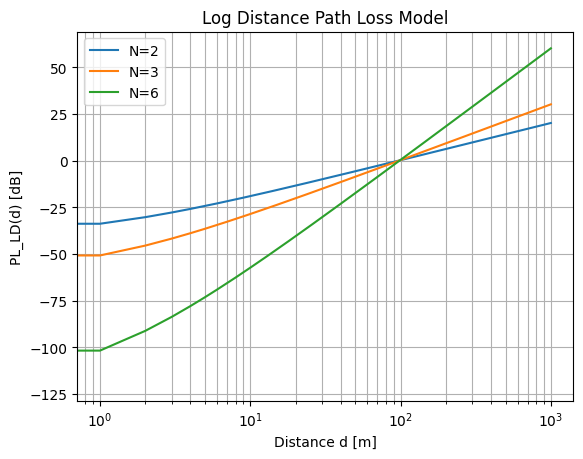

In [12]:
d0 = 100 # m
Gt = 1
Gr = 1
PLd0 = (Pt * Gt * Gr * wavelength**2) / ((4 * pi)**2 * d0**2 * L)
plt.figure()

for n in [2, 3, 6]:
    PL = []
    for d in range(1, 1000 + 1):
        PL.append(PLd0 + 10 * n * log10(d / d0))
    plt.plot(PL)
plt.legend(["N=2", "N=3", "N=6"])
plt.xlabel("Distance d [m]")
plt.ylabel("PL_LD(d) [dB]")
plt.title("Log Distance Path Loss Model")
plt.grid(which='both')
plt.xscale('log')
plt.show()

Factors that affect path loss is still distance, the more distance travelled the more path loss.
Another factor that is emphasized in the above graph is the path loss exponent.
The path loss exponent can refer to the amount of loss is a channel, which in air could be temperature, humdity or other factors.

### Q.4

PL<sub>LD</sub>[dB] = PL(d<sub>0</sub>)[dB] + 10<i>n</i>log(<sup>d</sup>/<sub>d<sub>0</sub></sub>) + X<sub>&sigma;</sub>

X<sub>&sigma;</sub> has a zero mean and a 3 dB standard deviation. Let n = 2 and other parameters
are the same as those in <i>Q.3</i>. Please run the simulation for three times with different random
seeds and plot path loss in the same figure.

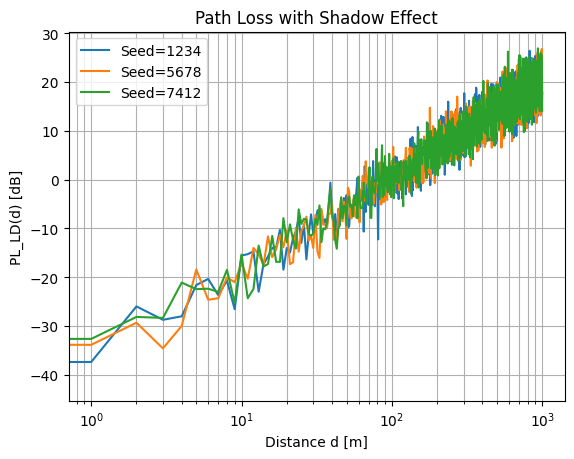

In [16]:
import numpy as np
n = 2
standard_deviation = 3 # dB
standard_mean = 0

seeds = [1234, 5678, 7412]
for s in seeds:
    np.random.seed(s)
    PL = []
    for d in range(1, 1000 + 1):
        PL.append(PLd0 + 10 * n * log10(d / d0) + np.random.normal(loc=standard_mean, scale=standard_deviation))
    plt.plot(PL)
plt.grid(which='both')
plt.xscale('log')
plt.title("Path Loss with Shadow Effect")
plt.xlabel("Distance d [m]")
plt.ylabel("PL_LD(d) [dB]")
plt.legend([f"Seed={seeds[0]}", f"Seed={seeds[1]}", f"Seed={seeds[2]}"])
plt.show()

## Okumura/Hata Model

### Q.5
Set frequency as 1.5GHz, the heights of TX and RX antenna are 30 m and 2 m, respectively.
The x-axis represents the distance from 1 m to 1000 m in the log scale, y-axis is the path loss in dB.
Please plot the curves for urban, suburban and open areas in the same figure for comparison.

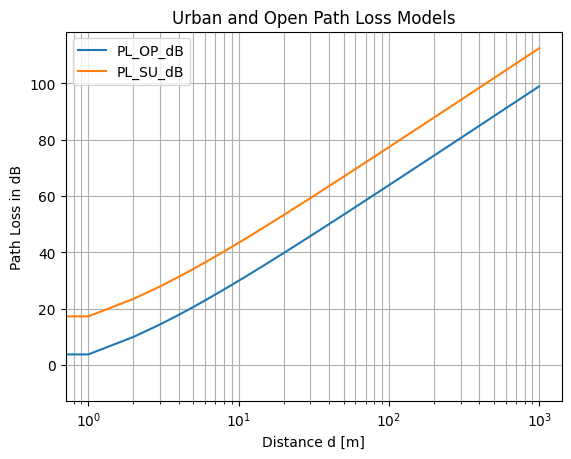

In [20]:
fc = 1.5e6 # Hz
ht = 30
hr = 2

Cr = 3.2 * (log10(11.75 * hr))**2 - 4.97

PL_SU_dB = []
PL_OP_dB = []
for d in range(1,1000 + 1):
    PL_U_dB = 69.55 + 26.16 * log10(fc) - 13.82 * log10(ht) - Cr + (44.9 - 6.55 * log10(ht)) * log10(d/1000) # because km
    PL_SU_dB.append(PL_U_dB - 2 * (log10(fc / 2*8))**2 - 5.4)
    PL_OP_dB.append(PL_U_dB - 4.78 * (log10(fc))**2 + 18.22 * log10(fc) - 40.97)
plt.figure()
plt.plot(PL_OP_dB)
plt.plot(PL_SU_dB)
plt.title("Urban and Open Path Loss Models")
plt.xlabel("Distance d [m]")
plt.ylabel("Path Loss in dB")
plt.xscale('log')
plt.grid(which='both')
plt.legend(["PL_OP_dB", "PL_SU_dB"])
plt.show()

## Small-Scale Fading

### Q.6
Compute the mean excess delay, RMS delay spread and Bc with correlation 0.9 or above
for ITU-R Pedestrian A Model.

In [21]:
from math import sqrt

amp = [1, 2, 3, 4]
delay = [0, 110, 190, 410]
power = [0, -9.7, -19.2, -22.8]

tao = sum([amp[i]**2 * delay[i] for i in range(len(amp))])/sum([amp[i]**2 for i in range(len(amp))])
tao_2 = sum([amp[i]**2 * delay[i]**2 for i in range(len(amp))])/sum([amp[i]**2 for i in range(len(amp))])
sigma = sqrt(tao_2 - tao**2)
Bc = 1/(50 * sigma)

print(f"Mean Excess Bandwidth = {tao}, RMS Spread Delay = {sigma}, B_c = {Bc}")

Mean Excess Bandwidth = 290.3333333333333, RMS Spread Delay = 133.42871588313452, B_c = 0.0001498927713395465
